# Forbes Billionairs Analysis

### Library imports

In [120]:
# data manipulation

import pandas as pd  
import numpy as np

# visualization

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

### Data Import

In [57]:
df = pd.read_csv("all_billionaires_1997_2023.csv")

In [58]:
df.shape

(31732, 19)

In [59]:
df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,2023,4,2540.0,1.0 B,Yu,Rong,Yu Rong,1971-12-14,51.0,Male,China,China,Shanghai,Healthcare,['Healthcare'],NaN,NaN,True,Decreased
31728,2023,4,2540.0,1.0 B,Yuengling,Richard,"Richard Yuengling, Jr.",1943-03-10,80.0,Male,United States,United States,Pottsville,Food & Beverage,['Food & Beverage'],NaN,NaN,False,Remained Even
31729,2023,4,2540.0,1.0 B,Zhang,Gongyun,Zhang Gongyun,1962-12-18,60.0,Male,China,China,Gaomi,Manufacturing,['Manufacturing'],NaN,NaN,True,Returned to List
31730,2023,4,2540.0,1.0 B,Zhang,Guiping,Zhang Guiping & family,1951-08-21,71.0,Male,China,China,Nanjing,Real Estate,['Real Estate'],NaN,NaN,True,Decreased


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31732 entries, 0 to 31731
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      31732 non-null  int64  
 1   month                     31732 non-null  int64  
 2   rank                      31714 non-null  float64
 3   net_worth                 31732 non-null  object 
 4   last_name                 28043 non-null  object 
 5   first_name                27985 non-null  object 
 6   full_name                 31732 non-null  object 
 7   birth_date                27328 non-null  object 
 8   age                       31057 non-null  float64
 9   gender                    27903 non-null  object 
 10  country_of_citizenship    31723 non-null  object 
 11  country_of_residence      31030 non-null  object 
 12  city_of_residence         30797 non-null  object 
 13  business_category         25889 non-null  object 
 14  busine

In this dataset we have yearly billionairs with rank and net worth. Also we have there personal information like name, gender birth date, contry where they live, etc. Also they are classified by industry types and whethere their wealth is increased or not.

### Duplicate values

In [61]:
df.duplicated().sum()

1

There are not any significant duplicate values to handle, So we'll drop them.

In [62]:
df = df.drop_duplicates()

### Null Values

In [63]:
df.isnull().sum() / len(df) * 100

year                         0.000000
month                        0.000000
rank                         0.056727
net_worth                    0.000000
last_name                   11.625855
first_name                  11.808641
full_name                    0.000000
birth_date                  13.879172
age                          2.127257
gender                      12.067064
country_of_citizenship       0.028363
country_of_residence         2.212348
city_of_residence            2.946645
business_category           18.414169
business_industries          3.119977
organization_name           86.171252
position_in_organization    85.213198
self_made                   11.625855
wealth_status               22.520563
dtype: float64

<Axes: >

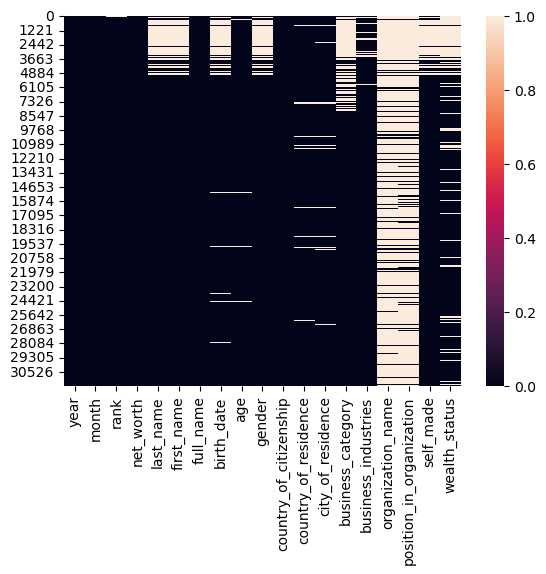

In [64]:
sns.heatmap(df.isnull())

- Columns like oraganization_name, position_in_organization has more than 85% of null values
- Also We have column called full name with no null values, So we'll drop the column of first and second name.
- Age is relavent column but we don't need birth_date column

In [65]:
df.drop(["first_name" , "last_name","organization_name", "position_in_organization","birth_date"], inplace=True, axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2107618515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["first_name" , "last_name","organization_name", "position_in_organization","birth_date"], inplace=True, axis=1)


## Handling Missing Values

<Axes: >

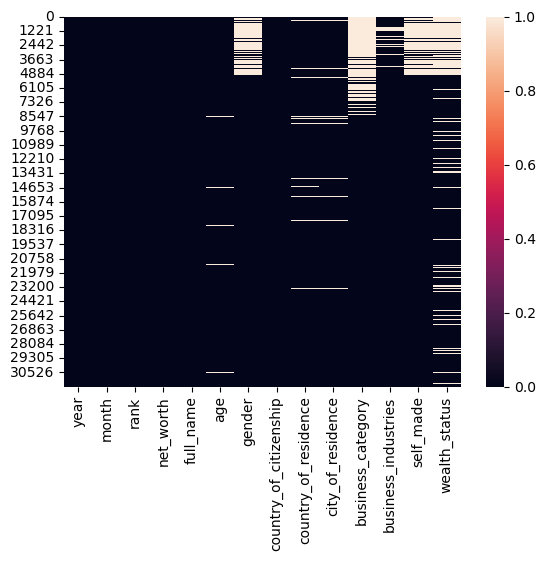

In [66]:
sns.heatmap(df.isnull())

# Coulmns for EDA
1. **year** :- This represents a year in which data is collected
2. **month** :- Month in which we collected the information
3. **rank** :- Rank of the billionairs according to their wealth
4. **net_worth** :- Amount of wealth Billionairs has in Billion
5. **full_name** :- Full name of the Billionairs
6. **age** :- Age of the Billionairs
7. **gender** :- Gender of the Billionairs
8. **country_of_citizenship** :- Name of the Country in which Billionairs has citizenship 
9. **country_of_residence** :- Name of the Country in which Billionairs resides 
10. **city_of_residence** :- Name of the City in which Billionairs resides
11. **business_category** :- Category of business
12. **business_industries** :- Number of Industries Billionairs involved in
13. **self_made** :- Is self made of not
14. **wealth_status** :- Wealth comparison to previous year

### Handling Missing Values In Gender
- We'll search gender of a perticular individual through out the data and will store it in the form of Key Value pair. Then we'll replace instance where gender is not available.

In [67]:
df["gender"].isnull().sum()

3829

In [68]:
# creating a dictonary of gender for billionairs
gender = {}
for i,j in enumerate(df["gender"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        gender[f"{name}"] = j

# replacing null gender if we have gender existed in our dictionary
for i,j in enumerate(df["gender"]):
    g = df.iloc[i]["gender"]
    name = df.iloc[i]["full_name"]
    if type(g) == float:
        try:
            df.iloc[i, 6] = gender[name]
        except:
            pass

In [69]:
df["gender"].isnull().sum()

717

- Significant amount of null data is filled by using this method, We'll use same technique to fill other null values of other features

### Country of residence

In [70]:
df["country_of_residence"].isnull().sum()

702

In [71]:
# creating a dictonary of contry of residence for billionairs
# if there are two values, most recent instace will get stored

country = {}
for i,j in enumerate(df["country_of_residence"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        country[f"{name}"] = j
        
for i,j in enumerate(df["country_of_residence"]):
    g = df.iloc[i]["country_of_residence"]
    if type(g) == float:
        try:
            df.iloc[i, 8] = country[df.iloc[i]["full_name"]]
        except:
            pass

In [72]:
df["country_of_residence"].isnull().sum()

517

### Country of Citizenship

In [73]:
df["country_of_citizenship"].isnull().sum()

9

In [74]:
citizen = {}
for i,j in enumerate(df["country_of_citizenship"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        citizen[f"{name}"] = j

for i,j in enumerate(df["country_of_citizenship"]):
    g = df.iloc[i]["country_of_citizenship"]
    if type(g) == float:
        try:
            df.iloc[i, 7] = citizen[df.iloc[i]["full_name"]]
        except:
            pass

In [75]:
df["country_of_citizenship"].isnull().sum()

0

Country of residence still has Null values, We'll impute then from country of citizenship. Assuming that billionaire live in same country as country of citizenship

In [76]:
df["country_of_residence"].isnull().sum()

517

In [77]:
for i,j in enumerate(df["country_of_residence"]):
    g = df.iloc[i]["country_of_residence"]
    if type(g) == float:
        try:
            df.iloc[i, 8] = citizen[df.iloc[i]["full_name"]]
        except:
            pass

In [78]:
df["country_of_residence"].isnull().sum()

0

### City of residence

In [79]:
# City of residence
df["city_of_residence"].isnull().sum()

935

In [80]:
city = {}
for i,j in enumerate(df["city_of_residence"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        city[f"{name}"] = j
        
for i,j in enumerate(df["city_of_residence"]):
    g = df.iloc[i]["city_of_residence"]
    if type(g) == float:
        try:
            df.iloc[i, 9] = city[df.iloc[i]["full_name"]]
        except:
            pass

In [81]:
df["city_of_residence"].isnull().sum()

644

To fill city of residence based on the city of residence.

In [82]:
city_mode = {}
for i in df["country_of_residence"].unique():
    try:
        city_mode[i] = x[i].index[0]
    except:
        city_mode[i] = i
        
for i,j in enumerate(df["city_of_residence"]):
    c = df.iloc[i]["country_of_residence"]
    if type(j) == float:
        df.iloc[i, 9] = city_mode[c]

In [83]:
df.isnull().sum()

year                         0
month                        0
rank                        18
net_worth                    0
full_name                    0
age                        675
gender                     717
country_of_citizenship       0
country_of_residence         0
city_of_residence            0
business_category         5843
business_industries        990
self_made                 3689
wealth_status             7146
dtype: int64

<Axes: >

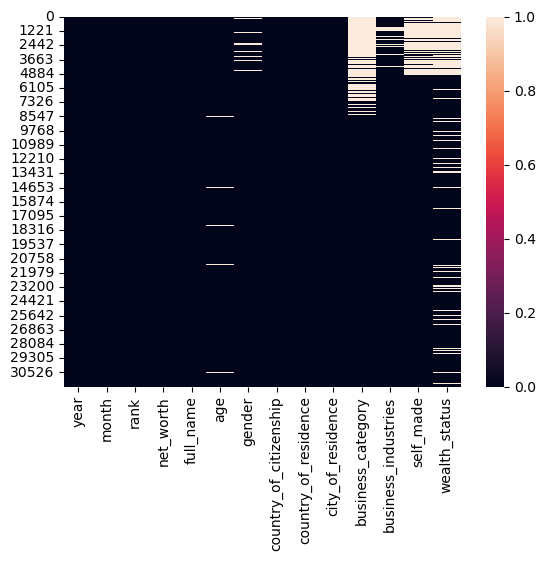

In [84]:
sns.heatmap(df.isnull())

Still there are 4, 5 columns need null value handling.

In [85]:
df[["business_category","business_industries"]]

,business_category,business_industries
0,Finance and Investments,['Finance and Investments']
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Fashion & Retail,['Fashion & Retail']
...,...,...
31727,Healthcare,['Healthcare']
31728,Food & Beverage,['Food & Beverage']
31729,Manufacturing,['Manufacturing']
31730,Real Estate,['Real Estate']


Primary observation is business industries has list of elements oncludes business category.

### business_industries
First I am converting business industries list to string

In [86]:
def set_str(s):
    try:
        return s.replace("[", "").replace("]", "").replace("'", "")
    except:
        return s

In [87]:
df["business_industries"] = df["business_industries"].apply(set_str)

C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2396055830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["business_industries"] = df["business_industries"].apply(set_str)


In [88]:
df["business_industries"]

0        Finance and Investments
1                            NaN
2                            NaN
3                            NaN
4               Fashion & Retail
                  ...           
31727                 Healthcare
31728            Food & Beverage
31729              Manufacturing
31730                Real Estate
31731                Diversified
Name: business_industries, Length: 31731, dtype: object

In [89]:
df["business_industries"].isnull().sum()

990

In [90]:
industries = {}
for i,j in enumerate(df["business_industries"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        industries[f"{name}"] = j
for i,j in enumerate(df["business_industries"]):
    g = df.iloc[i]["business_industries"]
    if type(g) == float:
        try:
            df.iloc[i, 11] = industries[df.iloc[i]["full_name"]]
        except:
            pass

In [91]:
df["business_industries"].isnull().sum()

138

### business_category

In [92]:
df["business_category"].isnull().sum()

5843

In [93]:
category = {}
for i,j in enumerate(df["business_category"]):
    name = df.iloc[i]["full_name"]
    try:
        if math.isnan(j):
            pass
    except:
        category[f"{name}"] = j
for i,j in enumerate(df["business_category"]):
    g = df.iloc[i]["business_category"]
    if type(g) == float:
        try:
            df.iloc[i, 10] = category[df.iloc[i]["full_name"]]
        except:
            pass

In [94]:
df["business_category"].isnull().sum()

1290

I am assuming that for null business category billionair has same business category as business industry

In [95]:
for i,j in enumerate(df["business_category"]):
    g = df.iloc[i]["business_category"]
    if type(g) == float:
        try:
            df.iloc[i, 10] = industries[df.iloc[i]["full_name"]]
        except:
            pass

In [96]:
df["business_category"].isnull().sum()

144

In [97]:
df.isnull().sum()

year                         0
month                        0
rank                        18
net_worth                    0
full_name                    0
age                        675
gender                     717
country_of_citizenship       0
country_of_residence         0
city_of_residence            0
business_category          144
business_industries        138
self_made                 3689
wealth_status             7146
dtype: int64

<Axes: >

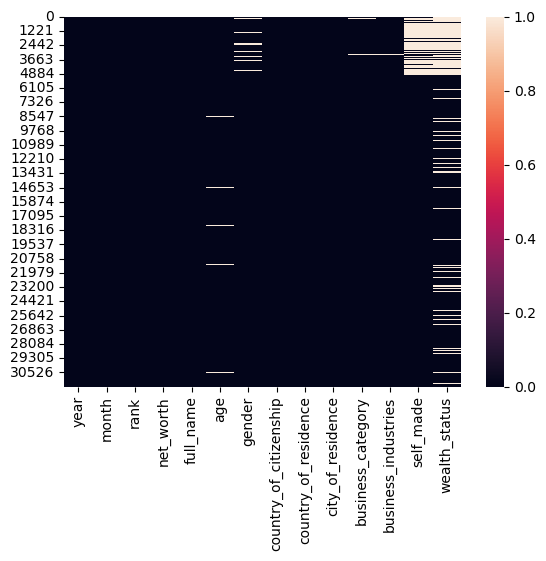

In [98]:
sns.heatmap(df.isnull())

### Changing data type of net worth column

In [99]:
df["net_worth"] = df["net_worth"].str.replace("B", "")
df["net_worth"] = df["net_worth"].astype(float)
df["net_worth"]

C:\Users\admin\AppData\Local\Temp\ipykernel_7628\732475393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["net_worth"] = df["net_worth"].str.replace("B", "")
C:\Users\admin\AppData\Local\Temp\ipykernel_7628\732475393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["net_worth"] = df["net_worth"].astype(float)


0        2.0
1        1.8
2        3.3
3        1.0
4        7.1
        ... 
31727    1.0
31728    1.0
31729    1.0
31730    1.0
31731    1.0
Name: net_worth, Length: 31731, dtype: float64

### Rank
Only year between 1997 to 2001 has missing ranks

In [100]:
def fill_rank(yrs):
    cnt = 1 # start rank
    for i in yrs:
        df.iloc[i, 2] = cnt
        cnt+=1

# Rank fill for each year
for yr in range(1997, 2001):
    # I am fetching index of the wealthiest billionairs in descending order year by year from 1997 - 2001
    year = df.sort_values(["year", "net_worth"], ascending=[True, False])[df["year"] == yr].index
    fill_rank(year)

C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2418874899.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year = df.sort_values(["year", "net_worth"], ascending=[True, False])[df["year"] == yr].index
C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2418874899.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year = df.sort_values(["year", "net_worth"], ascending=[True, False])[df["year"] == yr].index
C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2418874899.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year = df.sort_values(["year", "net_worth"], ascending=[True, False])[df["year"] == yr].index
C:\Users\admin\AppData\Local\Temp\ipykernel_7628\2418874899.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  year = df.sort_values(["year", "net_worth"], ascending=[True, False])[df["year"] == yr].index


In [101]:
df.isnull().sum()

year                         0
month                        0
rank                         0
net_worth                    0
full_name                    0
age                        675
gender                     717
country_of_citizenship       0
country_of_residence         0
city_of_residence            0
business_category          144
business_industries        138
self_made                 3689
wealth_status             7146
dtype: int64

### Wealth Status

We are comparing appearance of the billionaire year by year to fill the wealth status.

In [102]:
# Unique values of wealth status

df.wealth_status.unique()

array([nan, 'Decreased', 'Increased', 'Remained Even', 'Returned to List'],
      dtype=object)

Imputation flow
- If a billionaire join the list for the first time we'll set status as Increased
- If a billionaire doen't appear for first time but wasn't in the list for previous year, We'll mark it as Retured to List
- If wealth is equal to the previous year, We'll mark it as Remained Even
- If wealth is decreased, increased compare to previous year, We'll mark it as Decreased or Increased respectively.

In [103]:
# We will maintain a dictionary for each billionaire

ls = {}
for i in df.index:
    try:
        # Fetching name, wealth, year for each index
        name = df.iloc[i]["full_name"]
        wealth = df.iloc[i]["net_worth"]     # current net worth
        year = df.iloc[i]["year"]            # current year
        
        # Storing billionaires name as key with year and wealth as values
        ls[name] = {"year": year, "wealth": wealth}
        
        # If billionaire's name doesn't exist in keys, it means he/she appeared for first time.
        if name not in ls.keys():
            df.iloc[i, -1] = "Increased"
            
        else:
            # If not for first time but doen't appear for last year, it means he/she returned to list.
            if year - ls[name]["year"] > 1:   # checking gap between current year and previously appeared year.
                df.iloc[i, -1] = "Returned to List"
            
            # Same wealth as previous year.
            elif wealth == ls[name]["wealth"]:
                df.iloc[i, -1] = "Remained Even"
              
            # If wealth increased than previous year
            elif wealth > ls[name]["wealth"]:
                df.iloc[i, -1] = "Increased"
            
            # If wealth decreased than previous year
            else:
                df.iloc[i, -1] = "Descreased"
    except:
        pass

In [104]:
df["wealth_status"].isnull().sum()

0

<Axes: >

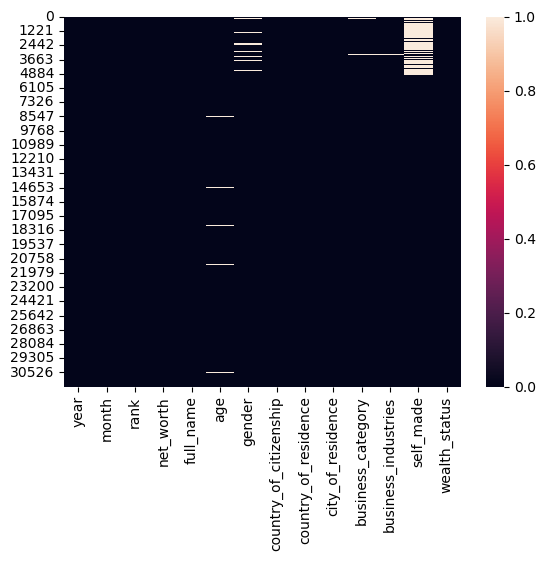

In [105]:
sns.heatmap(df.isnull())

### Self Made
Handling self made with Dictionary logic

In [106]:
self_made = {}
for i in df.index:
    try:
        v = df.iloc[i]["self_made"]
        name = df.iloc[i]["full_name"]
        if (type(v) != float):# and (name not in self_made.keys()):
            self_made[name] = v
    except:
        pass

for i in df.index:
    try:
        v = df.iloc[i]["self_made"]
        name = df.iloc[i]["full_name"]
        if (type(v) == float):
            df.iloc[i, -2] = self_made[name]
    except:
        pass

In [107]:
df.isnull().sum()["self_made"]

616

In [108]:
df.isnull().sum()

year                        0
month                       0
rank                        0
net_worth                   0
full_name                   0
age                       675
gender                    717
country_of_citizenship      0
country_of_residence        0
city_of_residence           0
business_category         144
business_industries       138
self_made                 616
wealth_status               0
dtype: int64

#### We'll fill the remaning null values by mean or most frequent value

<Axes: >

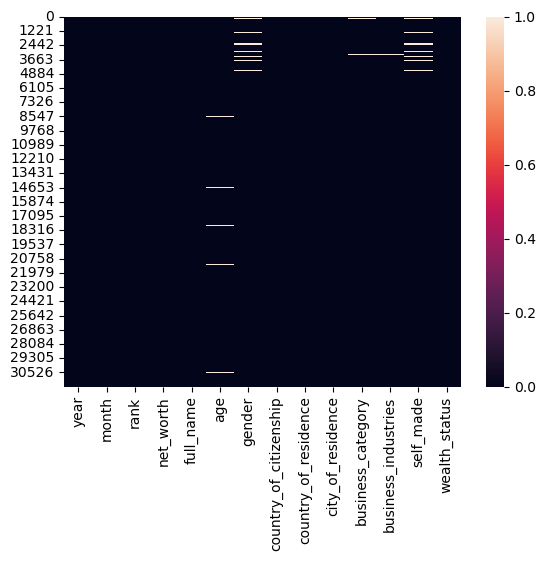

In [109]:
sns.heatmap(df.isnull())

In [122]:
print(f'Gender: {df["age"].mean()}')
df["age"] = df["age"].fillna(df["age"].mean())

age: 62.8355551262236


In [121]:
print(f'Gender: {df["gender"].mode()}')
df["gender"] = df["gender"].fillna(df["gender"].mode())

age: 0    Male
Name: gender, dtype: object


In [125]:
print(f'Business category: {df["business_category"].mode()}\n')
df["business_category"] = df["business_category"].fillna(df["business_category"].mode())

print(f'Business Industry: {df["business_industries"].mode()}\n')
df["business_industries"] = df["business_industries"].fillna(df["business_industries"].mode())

print(f'Self Made: {df["self_made"].mode()}')
df["self_made"] = df["self_made"].fillna(df["self_made"].mode())

Business category: 0    Technology
Name: business_category, dtype: object

Business Industry: 0    Technology
Name: business_industries, dtype: object

Self Made: 0    True
Name: self_made, dtype: object


### We'll Store this the processed CSV for Dashboard making on Power BI.

In [126]:
df.to_csv("processed_billionairs.csv")

# EDA

### Shift of wealth

<Axes: title={'center': 'Country of Residence'}, ylabel='full_name'>

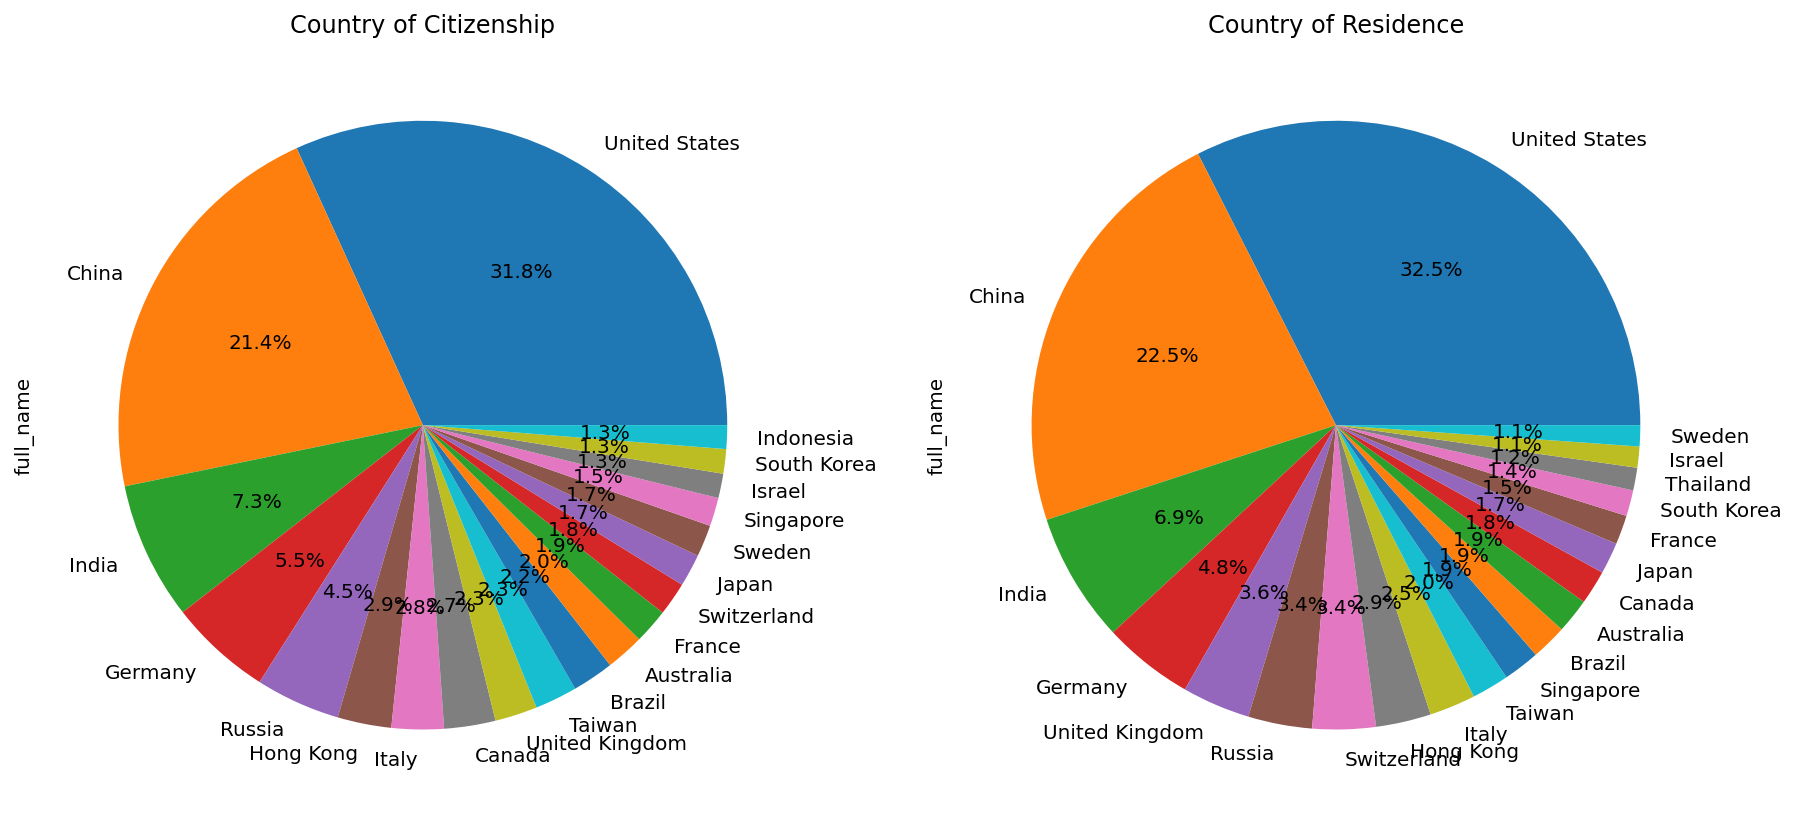

In [127]:
fig = plt.figure(figsize=(15,11),dpi=144)
fig.add_subplot(121)
df[df["year"] == 2023].groupby(["country_of_citizenship"])["full_name"].count().sort_values(ascending=False)[:20].plot(kind="pie", autopct="%1.1f%%", title="Country of Citizenship")
fig.add_subplot(122)
df[df["year"] == 2023].groupby(["country_of_residence"])["full_name"].count().sort_values(ascending=False)[:20].plot(kind="pie", autopct="%1.1f%%", title="Country of Residence")

We plotted 20 countries with most billionairs, United states and china has most of billionairs with their citizenship. But as per the observation around more than 2% of billionaires shifted to from other countries to UK or US making their contry of residece.

### Count of Billionairs of top 6 countries

In [128]:
df[df["year"] == 2023].groupby(["country_of_residence"])["full_name"].count().sort_values(ascending=False)[:6]

country_of_residence
United States     755
China             524
India             160
Germany           112
United Kingdom     84
Russia             79
Name: full_name, dtype: int64

Mostly billionairs reside in USA, China, India, Germany, UK and Russia. As they are major economies.

### Cities with most billionaires

In [129]:
df[df["year"] == 2023].groupby(["city_of_residence"])["full_name"].count().sort_values(ascending=False)[:6]

city_of_residence
New York     99
Hong Kong    69
Beijing      68
Shanghai     65
London       61
Moscow       60
Name: full_name, dtype: int64

Above chart shows Cities with most billionaires 

### Business Categories with most billionaires

In [130]:
df[df["year"] == 2023].groupby(["business_category"])["full_name"].count().sort_values(ascending=False)

business_category
Finance & Investments         372
Manufacturing                 324
Technology                    314
Fashion & Retail              266
Food & Beverage               212
Healthcare                    201
Real Estate                   193
Diversified                   187
Energy                        100
Media & Entertainment          91
Metals & Mining                74
Automotive                     73
Service                        53
Construction & Engineering     45
Logistics                      40
Sports                         39
Telecom                        31
Gambling & Casinos             25
Name: full_name, dtype: int64

Finance & Investments, Manufacturing, Technology, Fashion & Retail these four sectors hold maximum number of billionaires

### Most Richest Billionaire ever

In [131]:
df[df["net_worth"].max() == df["net_worth"]][["full_name", "net_worth"]]

,full_name,net_worth
26424,Elon Musk,219.0


As per this data Elon Musk was most richest person with 219 billion dollars.

### Richest billionaires per year

In [132]:
df.groupby(["year"], as_index=False).agg({'full_name': 'first', 'net_worth': 'max'})

,year,full_name,net_worth
0,1997,Chatri Sophonpanich & family,2.0
1,1998,Edmond Safra,3.3
2,1999,Srichand & Gopichand Hinduja,7.1
3,2000,Jose Luis Cutrale,4.5
4,2001,Bill Gates,58.7
5,2002,Bill Gates,52.8
6,2003,Bill Gates,40.7
7,2004,Bill Gates,46.6
8,2005,Bill Gates,46.5
9,2006,Bill Gates,50.0


### Busiess Category with most wealth

In [74]:
df[df["year"]==2023].groupby(["business_category"])["net_worth"].sum().sort_values(ascending=False)[:6]

business_category
Technology               1862.0
Fashion & Retail         1659.9
Finance & Investments    1586.4
Manufacturing            1006.3
Food & Beverage           936.1
Diversified               891.7
Name: net_worth, dtype: float64